In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the image
image_path = 'C:\\Users\\Coconut\\Desktop\\CPS4892\\Koala.png'
image = cv2.imread(image_path)

In [3]:
# Convert RGB to Grayscale
def rgb_to_grayscale(rgb_image):
    r, g, b = rgb_image[:, :, 0], rgb_image[:, :, 1], rgb_image[:, :, 2]
    gray_image = 0.299 * r + 0.587 * g + 0.114 * b
    return gray_image

image_gray = rgb_to_grayscale(image).astype(np.uint8)

In [4]:
# Add salt noise
def add_salt_noise(image, amount=0.05):
    noisy_image = image.copy()
    num_salt = 500 # Generate number of salt pixels
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape] # Generate Random Coordinates
    noisy_image[coords] = 255
    return noisy_image

In [5]:
# Add pepper noise
def add_pepper_noise(image, amount=0.05):
    noisy_image = image.copy()
    num_pepper = 500 # Generate number of pepper pixels
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords] = 0
    return noisy_image

In [6]:
# Add Gaussian noise
def add_gaussian_noise(image, mean=0, var=0.01):
    sigma = var ** 0.5 # Calculate the Standard Deviation
    gaussian = np.random.normal(mean, sigma, image.shape) # Generate Gaussian Noise
    noisy_image = image + gaussian * 255
    # Clip the Pixel Values
    noisy_image[noisy_image > 255] = 255
    noisy_image[noisy_image < 0] = 0
    return noisy_image.astype(np.uint8)

In [7]:
# Add noise to the image
salt_noise_image = add_salt_noise(image_gray)
pepper_noise_image = add_pepper_noise(image_gray)
gaussian_noise_image = add_gaussian_noise(image_gray)

C:\Users\Coconut\AppData\Local\Temp\ipykernel_27156\4167149823.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noisy_image[coords] = 255


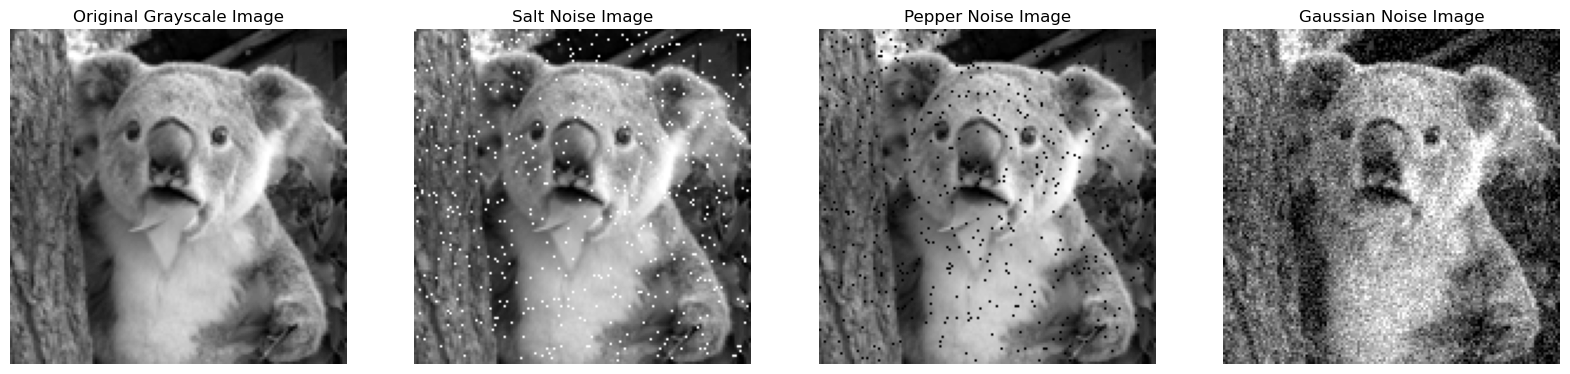

In [8]:
# Display the images
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(image_gray, cmap='gray')
axs[0].set_title('Original Grayscale Image')
axs[0].axis('off')

axs[1].imshow(salt_noise_image, cmap='gray')
axs[1].set_title('Salt Noise Image')
axs[1].axis('off')

axs[2].imshow(pepper_noise_image, cmap='gray')
axs[2].set_title('Pepper Noise Image')
axs[2].axis('off')

axs[3].imshow(gaussian_noise_image, cmap='gray')
axs[3].set_title('Gaussian Noise Image')
axs[3].axis('off')

plt.show()

In [9]:
def median_filter(image, kernel_size=3):
    height_image, width_image = image.shape
    height_filter, width_filter = kernel_size, kernel_size
    height_output = height_image - height_filter + 1
    width_output = width_image - width_filter + 1
    
    filtered_image = np.zeros((height_output, width_output))
    
    for i in range(height_output):
        for j in range(width_output):
            current_window = image[i:i + height_filter, j:j + width_filter]
            filtered_image[i, j] = calculate_median(current_window)
    
    return filtered_image.astype(np.uint8) 

In [10]:
def calculate_median(window):
    window_values = []  # Initialize an empty list to store the values of the window
    # Iterate over each element in the window and append it to the list
    for i in range(window.shape[0]):
        for j in range(window.shape[1]):
            window_values.append(window[i, j])
    sorted_window = sorted(window_values)
    median_index = len(sorted_window) // 2  # Calculate the index of the median value
    if len(sorted_window) % 2 == 0:
        median_value = (sorted_window[median_index - 1] + sorted_window[median_index]) / 2
    else:
        median_value = sorted_window[median_index]
    return median_value

In [11]:
denoised_salt_noise_image = median_filter(salt_noise_image)
denoised_pepper_noise_image = median_filter(pepper_noise_image)
denoised_gaussian_noise_image = median_filter(gaussian_noise_image)

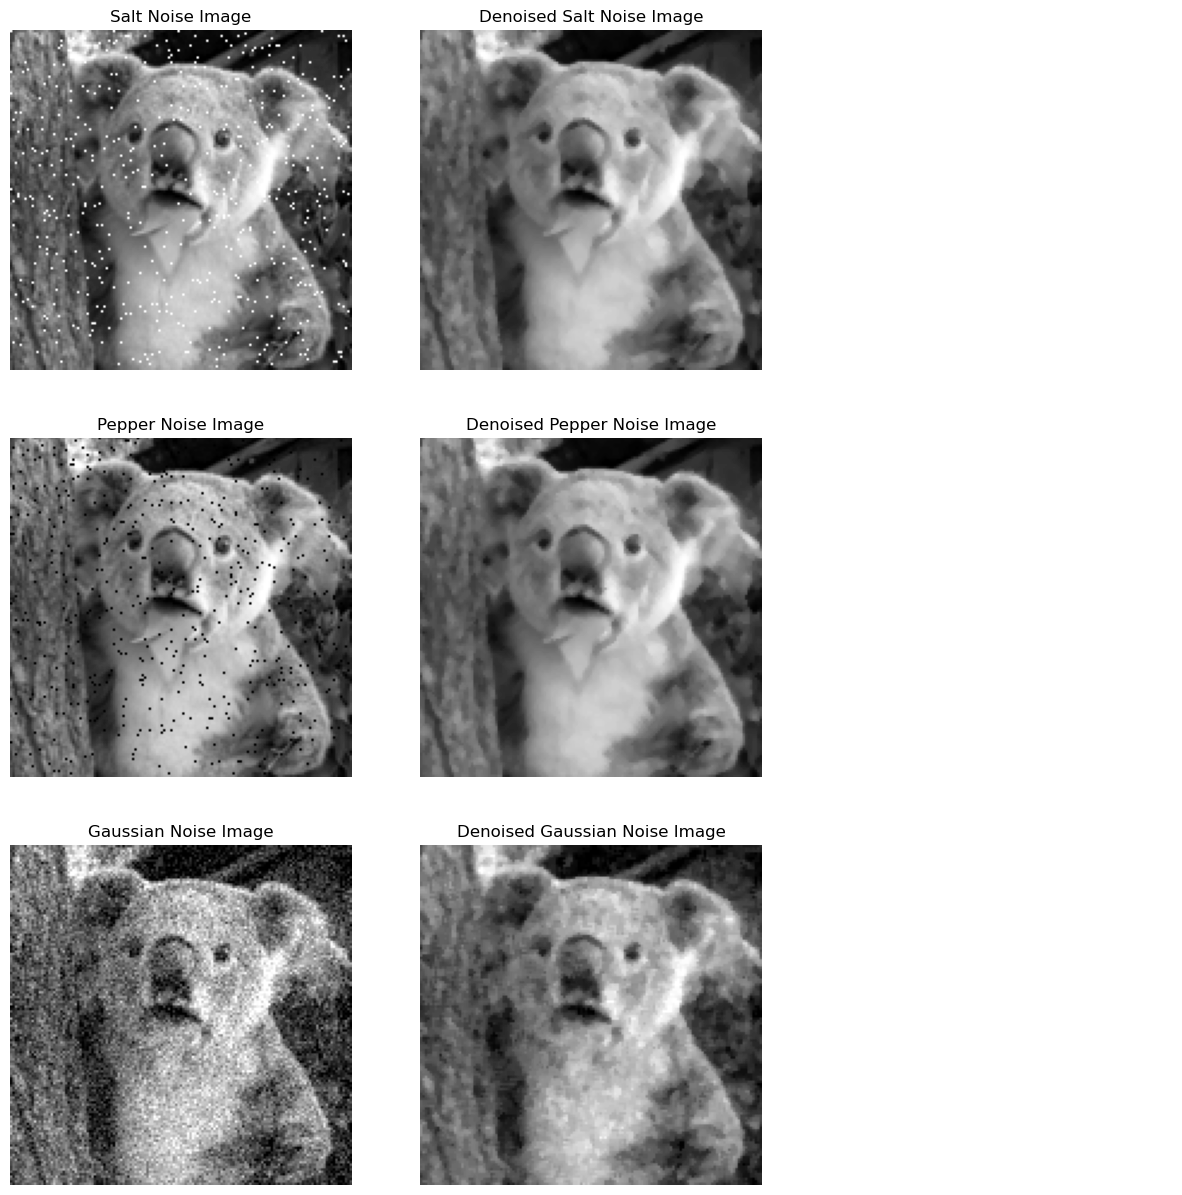

In [12]:
# Display the images
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Salt noise images
axs[0, 0].imshow(salt_noise_image, cmap='gray')
axs[0, 0].set_title('Salt Noise Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(denoised_salt_noise_image, cmap='gray')
axs[0, 1].set_title('Denoised Salt Noise Image')
axs[0, 1].axis('off')

# Pepper noise images
axs[1, 0].imshow(pepper_noise_image, cmap='gray')
axs[1, 0].set_title('Pepper Noise Image')
axs[1, 0].axis('off')

axs[1, 1].imshow(denoised_pepper_noise_image, cmap='gray')
axs[1, 1].set_title('Denoised Pepper Noise Image')
axs[1, 1].axis('off')

# Gaussian noise images
axs[2, 0].imshow(gaussian_noise_image, cmap='gray')
axs[2, 0].set_title('Gaussian Noise Image')
axs[2, 0].axis('off')

axs[2, 1].imshow(denoised_gaussian_noise_image, cmap='gray')
axs[2, 1].set_title('Denoised Gaussian Noise Image')
axs[2, 1].axis('off')

# Turn off unused axes
for i in range(3):
    axs[i, 2].axis('off')

plt.show()

In [13]:
def max_filter(image, kernel_size=3):
    height_image, width_image = image.shape
    height_filter, width_filter = kernel_size, kernel_size
    height_output = height_image - height_filter + 1
    width_output = width_image - width_filter + 1
    
    filtered_image = np.zeros((height_output, width_output))
    
    for i in range(height_output):
        for j in range(width_output):
            current_window = image[i:i + height_filter, j:j + width_filter]
            filtered_image[i, j] = calculate_max(current_window)
    
    return filtered_image.astype(np.uint8)

In [14]:
def calculate_max(window):
    max_value = window[0, 0]
    for i in range(window.shape[0]):
        for j in range(window.shape[1]):
            if window[i, j] > max_value:
                max_value = window[i, j]
    return max_value

In [15]:
denoised_salt_noise_image = max_filter(salt_noise_image)
denoised_pepper_noise_image = max_filter(pepper_noise_image)
denoised_gaussian_noise_image = max_filter(gaussian_noise_image)

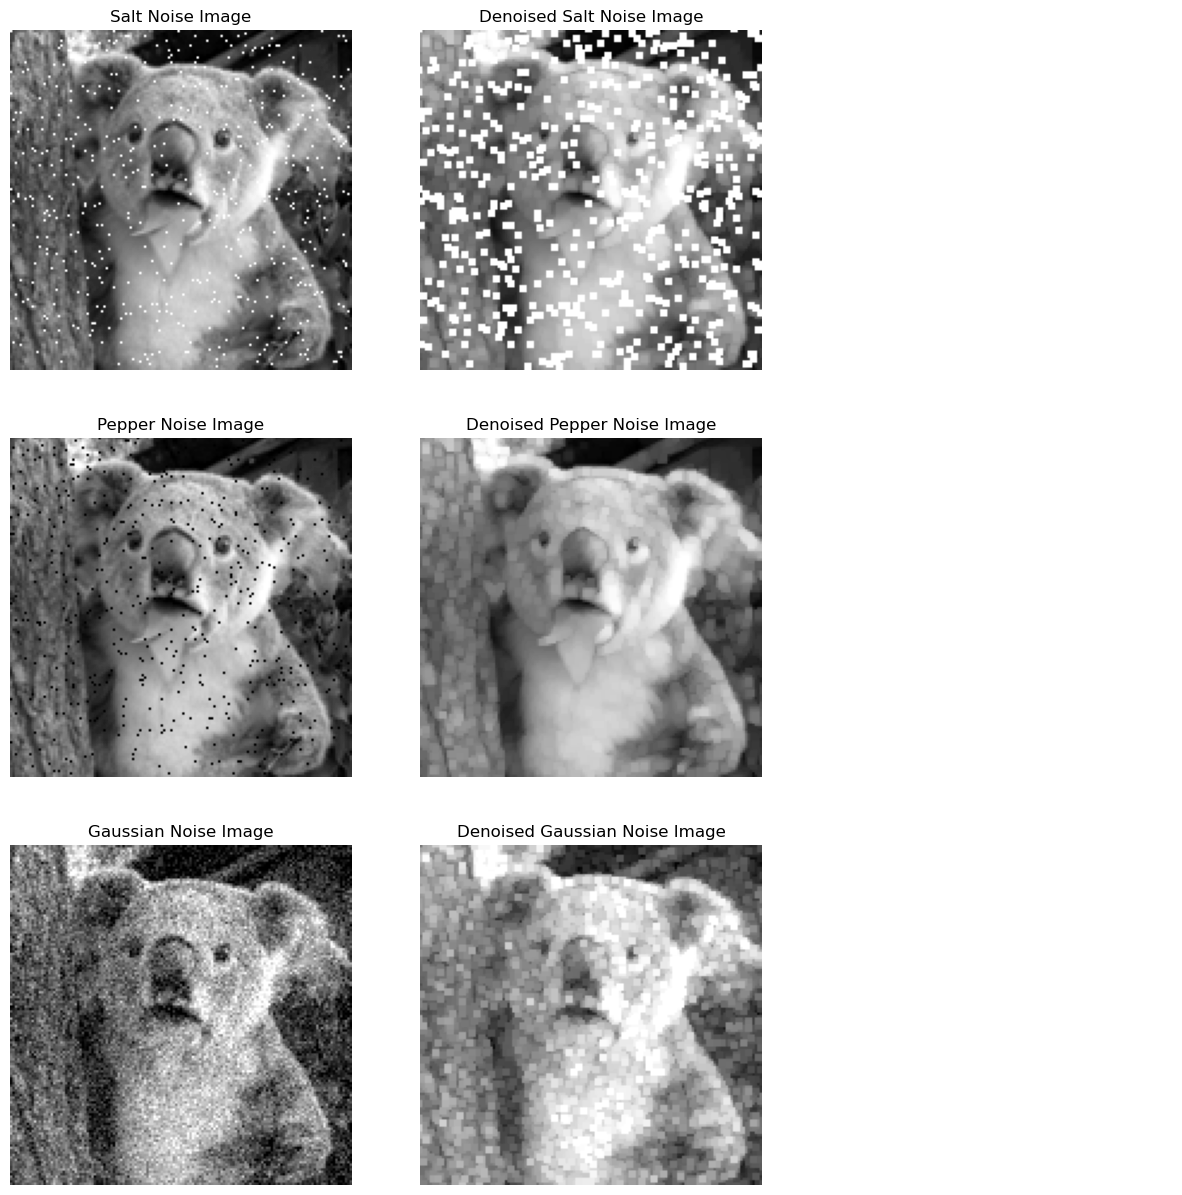

In [16]:
# Display the images
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Salt noise images
axs[0, 0].imshow(salt_noise_image, cmap='gray')
axs[0, 0].set_title('Salt Noise Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(denoised_salt_noise_image, cmap='gray')
axs[0, 1].set_title('Denoised Salt Noise Image')
axs[0, 1].axis('off')

# Pepper noise images
axs[1, 0].imshow(pepper_noise_image, cmap='gray')
axs[1, 0].set_title('Pepper Noise Image')
axs[1, 0].axis('off')

axs[1, 1].imshow(denoised_pepper_noise_image, cmap='gray')
axs[1, 1].set_title('Denoised Pepper Noise Image')
axs[1, 1].axis('off')

# Gaussian noise images
axs[2, 0].imshow(gaussian_noise_image, cmap='gray')
axs[2, 0].set_title('Gaussian Noise Image')
axs[2, 0].axis('off')

axs[2, 1].imshow(denoised_gaussian_noise_image, cmap='gray')
axs[2, 1].set_title('Denoised Gaussian Noise Image')
axs[2, 1].axis('off')

# Turn off unused axes
for i in range(3):
    axs[i, 2].axis('off')

plt.show()

In [17]:
def min_filter(image, kernel_size=3):
    height_image, width_image = image.shape
    height_filter, width_filter = kernel_size, kernel_size
    height_output = height_image - height_filter + 1
    width_output = width_image - width_filter + 1
    
    filtered_image = np.zeros((height_output, width_output))
    
    for i in range(height_output):
        for j in range(width_output):
            current_window = image[i:i + height_filter, j:j + width_filter]
            filtered_image[i, j] = calculate_min(current_window)
    
    return filtered_image.astype(np.uint8)

In [18]:
def calculate_min(window):
    min_value = window[0, 0]
    for i in range(window.shape[0]):
        for j in range(window.shape[1]):
            if window[i, j] < min_value:
                min_value = window[i, j]
    return min_value

In [19]:
denoised_salt_noise_image = min_filter(salt_noise_image)
denoised_pepper_noise_image = min_filter(pepper_noise_image)
denoised_gaussian_noise_image = min_filter(gaussian_noise_image)

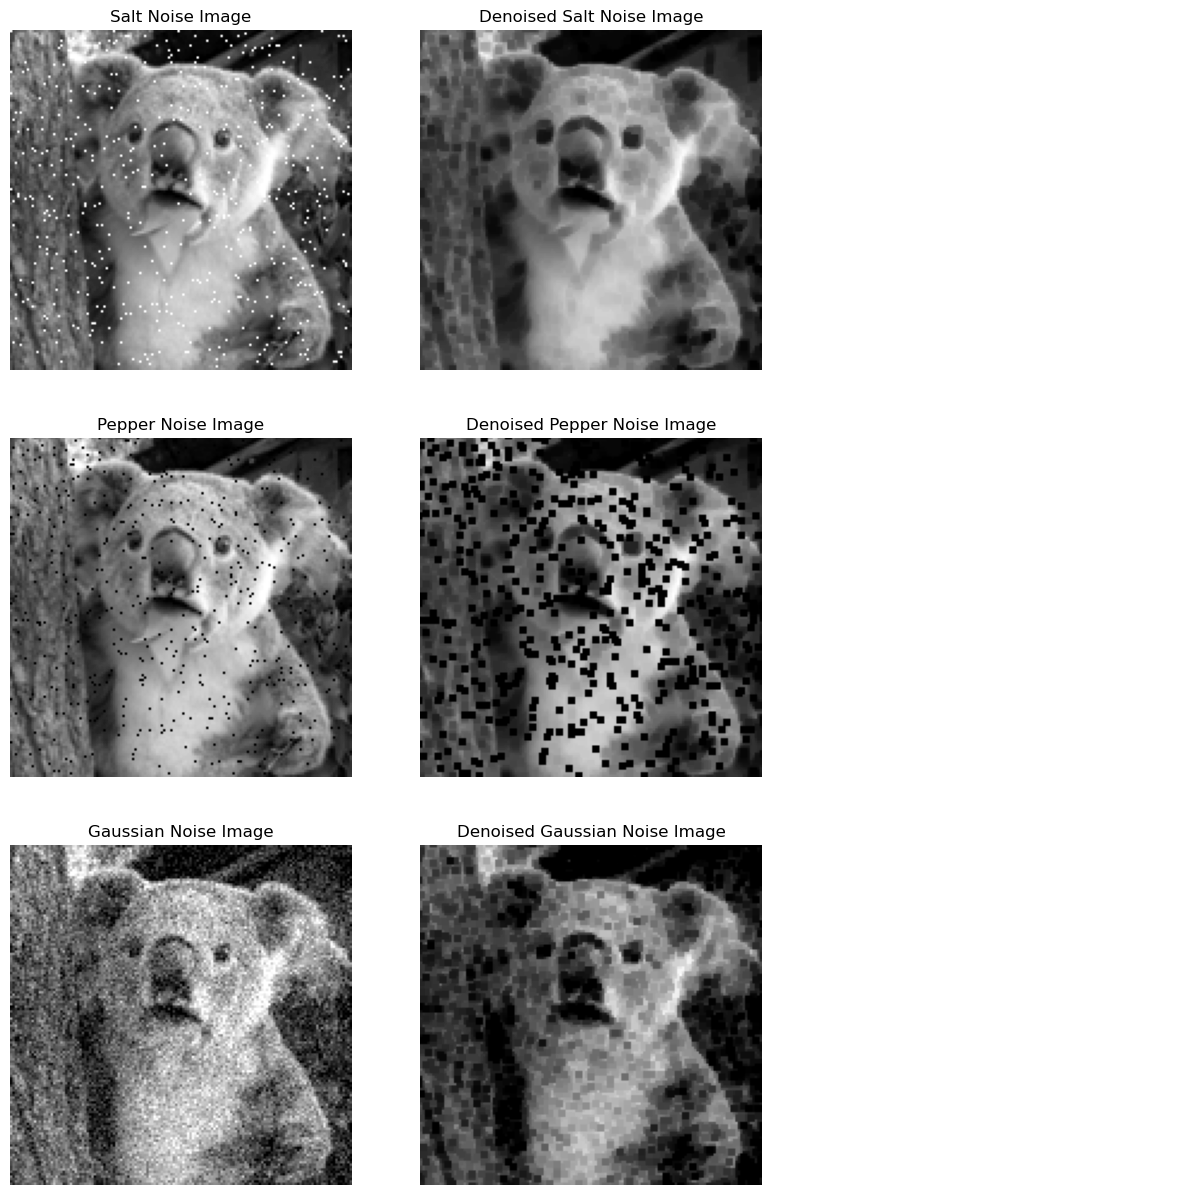

In [20]:
# Display the images
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Salt noise images
axs[0, 0].imshow(salt_noise_image, cmap='gray')
axs[0, 0].set_title('Salt Noise Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(denoised_salt_noise_image, cmap='gray')
axs[0, 1].set_title('Denoised Salt Noise Image')
axs[0, 1].axis('off')

# Pepper noise images
axs[1, 0].imshow(pepper_noise_image, cmap='gray')
axs[1, 0].set_title('Pepper Noise Image')
axs[1, 0].axis('off')

axs[1, 1].imshow(denoised_pepper_noise_image, cmap='gray')
axs[1, 1].set_title('Denoised Pepper Noise Image')
axs[1, 1].axis('off')

# Gaussian noise images
axs[2, 0].imshow(gaussian_noise_image, cmap='gray')
axs[2, 0].set_title('Gaussian Noise Image')
axs[2, 0].axis('off')

axs[2, 1].imshow(denoised_gaussian_noise_image, cmap='gray')
axs[2, 1].set_title('Denoised Gaussian Noise Image')
axs[2, 1].axis('off')

# Turn off unused axes
for i in range(3):
    axs[i, 2].axis('off')

plt.show()